In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data       

In [2]:
start = '2010-01-01'
end = '2022-07-01'
stock = ['AAPL']
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004
2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.440002
2022-06-29,140.669998,136.669998,137.460007,139.229996,66242400.0,139.229996
2022-06-30,138.369995,133.770004,137.250000,136.720001,98964500.0,136.720001
2022-07-01,139.039993,135.660004,136.039993,138.929993,71007500.0,138.929993


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


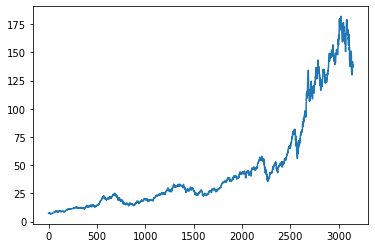

In [6]:
plt.plot(df.Close)

In [7]:
mavg100 = df.Close.rolling(100).mean()
mavg100


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3142    158.301401
3143    157.917401
3144    157.580701
3145    157.224001
3146    156.896701
Name: Close, Length: 3147, dtype: float64

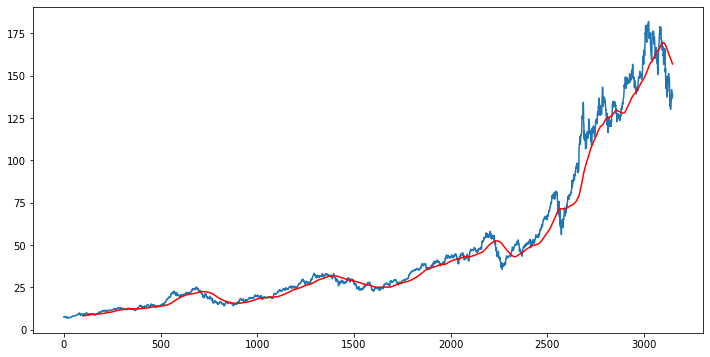

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mavg100,'r')

In [9]:
mavg200 = df.Close.rolling(200).mean()

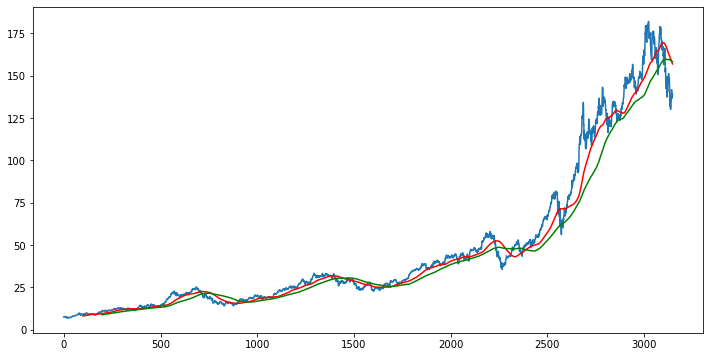

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mavg100,'r')
plt.plot(mavg200,'g')

In [11]:
df.shape

(3147, 5)

In [15]:
#splitting data into training and testing 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

#print(data_training.shape())
#print(data_testing.shape())

In [16]:
data_training

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714
...,...
2197,55.197498
2198,55.547501
2199,55.105000
2200,56.237499


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.96048261],
       [0.98302841],
       [0.98696029]])

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]) :
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train ,y_train = np.array(x_train),np.array(y_train)

In [20]:
x_train

array([[[0.01328146],
        [0.01561354],
        [0.01587662],
        ...,
        [0.03574197],
        [0.03889878],
        [0.03780386]],

       [[0.01561354],
        [0.01587662],
        [0.01345211],
        ...,
        [0.03889878],
        [0.03780386],
        [0.03701464]],

       [[0.01587662],
        [0.01345211],
        [0.01317481],
        ...,
        [0.03780386],
        [0.03701464],
        [0.04358427]],

       ...,

       [[0.77837423],
        [0.78499365],
        [0.78942318],
        ...,
        [0.94674612],
        [0.96232408],
        [0.96929192]],

       [[0.78499365],
        [0.78942318],
        [0.79594303],
        ...,
        [0.96232408],
        [0.96929192],
        [0.96048261]],

       [[0.78942318],
        [0.79594303],
        [0.80928135],
        ...,
        [0.96929192],
        [0.96048261],
        [0.98302841]]])

In [21]:
#ML Model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
import keras

In [22]:
model = keras.Sequential()
model.add(LSTM(units=50,activation = 'relu' , return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu' , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu' , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
66/66 [==============================] - 24s 225ms/step - loss: 0.0328
Epoch 2/50
66/66 [==============================] - 15s 231ms/step - loss: 0.0067
Epoch 3/50
66/66 [==============================] - 16s 236ms/step - loss: 0.0052
Epoch 4/50
66/66 [==============================] - 16s 248ms/step - loss: 0.0050
Epoch 5/50
66/66 [==============================] - 17s 252ms/step - loss: 0.0043
Epoch 6/50
66/66 [==============================] - 17s 260ms/step - loss: 0.0046
Epoch 7/50
66/66 [==============================] - 17s 258ms/step - loss: 0.0043
Epoch 8/50
66/66 [==============================] - 16s 241ms/step - loss: 0.0044
Epoch 9/50
66/66 [==============================] - 16s 240ms/step - loss: 0.0036
Epoch 10/50
66/66 [==============================] - 17s 253ms/step - loss: 0.0036
Epoch 11/50
66/66 [==============================] - 17s 255ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0033
Epoch 13/50
6

In [25]:
# here we are doing time series analysis
model.save('keras_model.h5')

In [26]:
data_training.tail(100) #we need to append so that we can have for testing y data

,Close
2102,46.840000
2103,47.509998
2104,47.147499
2105,47.037498
2106,46.610001
...,...
2197,55.197498
2198,55.547501
2199,55.105000
2200,56.237499


In [27]:
data_testing.head()

,Close
2202,56.814999
2203,57.320000
2204,58.017502
2205,56.997501
2206,56.072498


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing,ignore_index= True)

C:\Users\Neeraj singh\AppData\Local\Temp\ipykernel_14960\227668043.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index= True)


In [30]:
final_df.head()

,Close
0,46.840000
1,47.509998
2,47.147499
3,47.037498
4,46.610001


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07710165],
       [0.08167618],
       [0.07920115],
       ...,
       [0.70791158],
       [0.69077412],
       [0.70586325]])

In [32]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]) :
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [33]:
x_test , y_test = np.array(x_test),np.array(y_test)

In [34]:
print(x_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [35]:
#making predictions
y_predict = model.predict(x_test)

30/30 [==============================] - 4s 88ms/step


In [36]:
y_predict

array([[0.19111528],
       [0.19107175],
       [0.19123147],
       [0.19163829],
       [0.19228357],
       [0.19310021],
       [0.19399962],
       [0.19491568],
       [0.19573903],
       [0.19636182],
       [0.19673958],
       [0.19684221],
       [0.1966933 ],
       [0.19633794],
       [0.19580097],
       [0.19512607],
       [0.19437255],
       [0.1936144 ],
       [0.19286731],
       [0.19215725],
       [0.19148418],
       [0.19081677],
       [0.19012693],
       [0.18943289],
       [0.18879113],
       [0.18817073],
       [0.187497  ],
       [0.1867151 ],
       [0.18581161],
       [0.18479371],
       [0.18366417],
       [0.18238802],
       [0.18093568],
       [0.17927241],
       [0.17738497],
       [0.17531541],
       [0.17309296],
       [0.17071924],
       [0.168198  ],
       [0.16553128],
       [0.16274169],
       [0.15986384],
       [0.15697688],
       [0.15417096],
       [0.15151834],
       [0.14910212],
       [0.14695305],
       [0.145

In [37]:
y_test

array([0.14520781, 0.1486558 , 0.15341813, 0.14645388, 0.14013825,
       0.13925067, 0.14454211, 0.12660237, 0.12334215, 0.13641717,
       0.1283093 , 0.13648544, 0.13484681, 0.12602203, 0.13163779,
       0.13392506, 0.13747546, 0.12443458, 0.13247419, 0.12649996,
       0.11956987, 0.1213792 , 0.13086968, 0.13660494, 0.1114449 ,
       0.10139113, 0.10511224, 0.115661  , 0.11316891, 0.10630708,
       0.08872578, 0.08541435, 0.07614578, 0.08401469, 0.08763335,
       0.07454126, 0.05938379, 0.05904241, 0.05137833, 0.05535546,
       0.05470684, 0.06614321, 0.06377059, 0.06211488, 0.07276608,
       0.0588888 , 0.05552616, 0.04489204, 0.04678673, 0.04513101,
       0.04593327, 0.04909106, 0.03975419, 0.03712555, 0.0407613 ,
       0.03191943, 0.02498933, 0.0145771 , 0.00792012, 0.02556968,
       0.02382861, 0.02396517, 0.02654264, 0.02684987, 0.        ,
       0.010361  , 0.00979771, 0.01461125, 0.01898096, 0.01981736,
       0.01723989, 0.01333105, 0.01857132, 0.02176325, 0.02333

In [38]:
scaler.scale_  # gives us the factor for which it is scaled down so we divide ypred and ytest by this

array([0.00682769])

In [39]:
scale_factor = 1/0.00682769
y_predict = y_predict*scale_factor
y_test = y_test*scale_factor

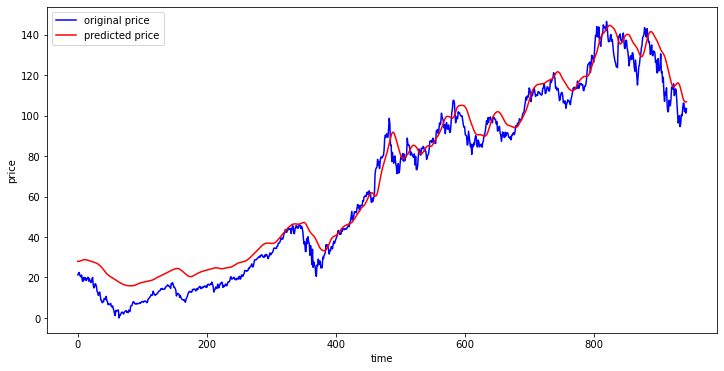

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="original price")
plt.plot(y_predict,'r',label="predicted price")
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()